# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
weather_api_key


'd6569dbd31b83088686b8b3d442ccf28'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 563


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        city_weather
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san antonio de pale
Processing Record 2 of Set 1 | cutral-co
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | charters towers
Processing Record 10 of Set 1 | vilyuchinsk
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | thunder bay
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | silvania
Processing Record 20 of Set 1 | al-`ula
City not found. Skipping...
Processing Record 21 of Set 1 | anadyr
Processing Re

In [4]:
# TV Maze show search base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
#query_url = url + "appid=" + weather_api_key + "&q=" + city
query_url = url + "q=" + city + "&appid=" + weather_api_key
print(query_url)

response = requests.get(query_url).json()
response




http://api.openweathermap.org/data/2.5/weather?q=London&appid=d6569dbd31b83088686b8b3d442ccf28


{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 280.49,
  'feels_like': 278.1,
  'temp_min': 279.02,
  'temp_max': 281.92,
  'pressure': 999,
  'humidity': 92},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 140},
 'clouds': {'all': 100},
 'dt': 1701983474,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1701935478,
  'sunset': 1701964357},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          534
Lat           534
Lng           534
Max Temp      534
Humidity      534
Cloudiness    534
Wind Speed    534
Country       534
Date          534
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,26.18,82,97,3.60,GQ,1701983729
1,cutral-co,-38.9469,-69.2089,29.95,10,64,1.34,AR,1701983730
2,college,64.8569,-147.8028,-17.01,79,40,3.60,US,1701983730
3,stanley,54.8680,-1.6985,4.60,94,75,4.12,GB,1701983730
4,bredasdorp,-34.5322,20.0403,18.46,86,0,5.12,ZA,1701983730


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,26.18,82,97,3.60,GQ,1701983729
1,cutral-co,-38.9469,-69.2089,29.95,10,64,1.34,AR,1701983730
2,college,64.8569,-147.8028,-17.01,79,40,3.60,US,1701983730
3,stanley,54.8680,-1.6985,4.60,94,75,4.12,GB,1701983730
4,bredasdorp,-34.5322,20.0403,18.46,86,0,5.12,ZA,1701983730


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

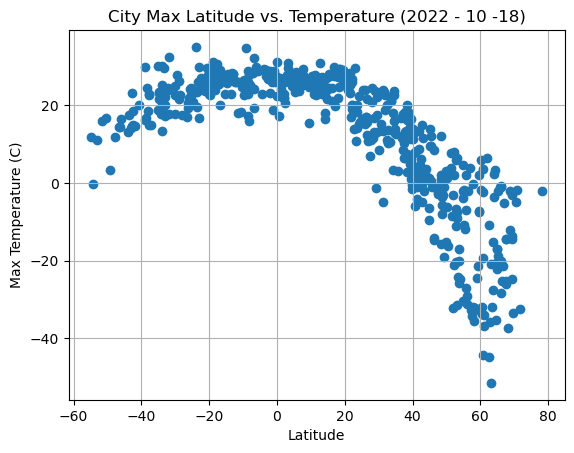

In [10]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022 - 10 -18)')
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

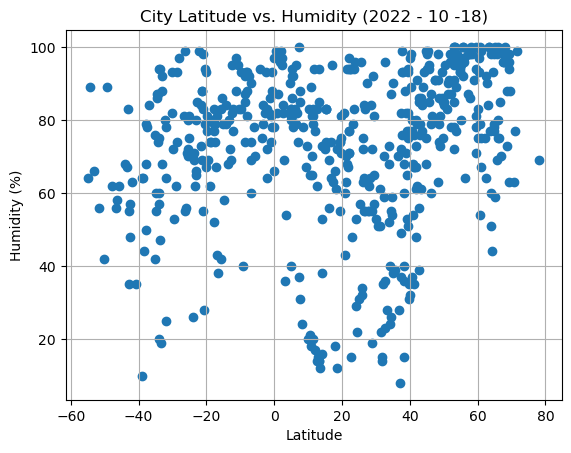

In [11]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022 - 10 -18)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

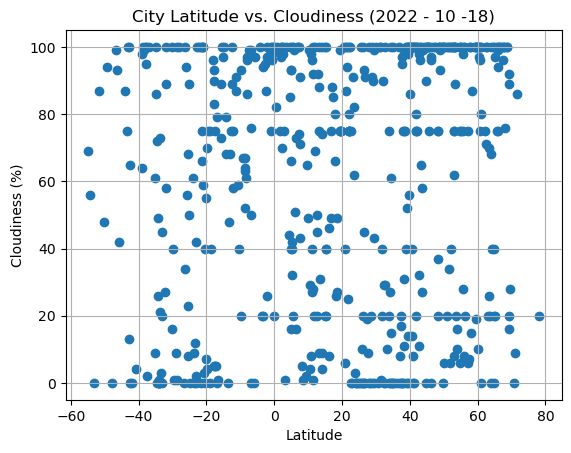

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022 - 10 -18)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

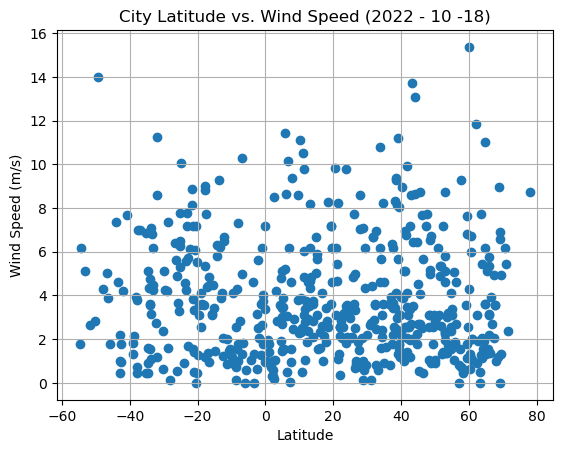

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022 - 10 -18)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
from scipy.stats import linregress
import scipy.stats as st


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,college,64.8569,-147.8028,-17.01,79,40,3.60,US,1701983730
3,stanley,54.8680,-1.6985,4.60,94,75,4.12,GB,1701983730
6,kodiak,57.7900,-152.4072,-0.27,86,100,9.26,US,1701983730
9,vilyuchinsk,52.9306,158.4028,-6.71,78,100,1.96,RU,1701983731
11,yellowknife,62.4560,-114.3525,-10.71,92,100,3.09,CA,1701983731


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,26.18,82,97,3.60,GQ,1701983729
1,cutral-co,-38.9469,-69.2089,29.95,10,64,1.34,AR,1701983730
4,bredasdorp,-34.5322,20.0403,18.46,86,0,5.12,ZA,1701983730
5,port-aux-francais,-49.3500,70.2167,3.39,89,94,13.98,TF,1701983730
7,port elizabeth,-33.9180,25.5701,20.05,94,0,1.54,ZA,1701983730


###  Temperature vs. Latitude Linear Regression Plot

y = -0.79x + 35.63
The r-value is: 0.7217141531552499


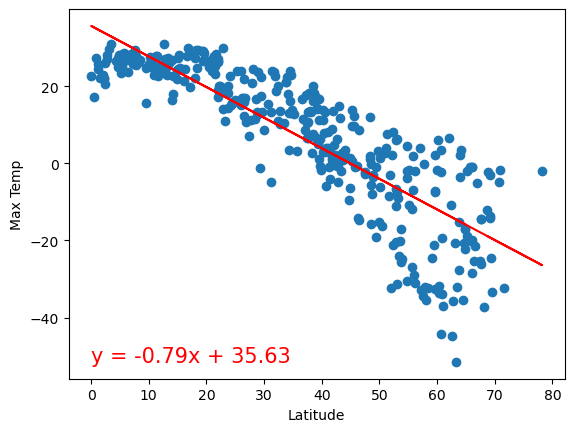

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

correlation = st.pearsonr(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


#print(regress_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

# Label plot and annotate the line equation
plt.annotate(line_equation,(x_values.min(), y_values.min()),fontsize=15,color="red")
(x_values, y_values, "Max Temp", (240, 20))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.26x + 29.19
The r-value is: 0.4090198114100215


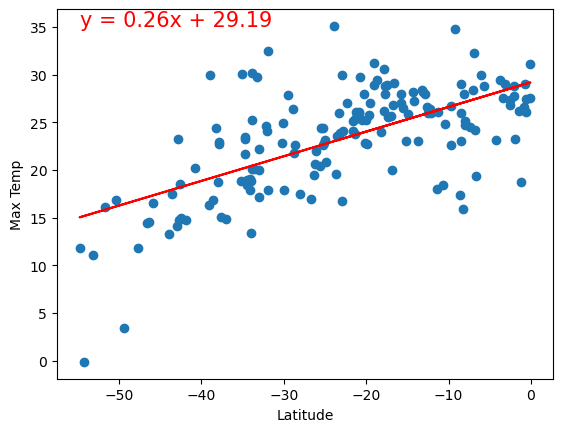

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

correlation = st.pearsonr(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


#print(regress_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

# Label plot and annotate the line equation
plt.annotate(line_equation,(x_values.min(), y_values.max()), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere: 
- The negative slope of -0.79 suggests a negative correlation which indicates the latitude and the maximum temperature. As the latitude increases, the temperature is decreasing. The intercept for Northern Hemisphere is 35.63 which suggests that this is the estimated max temperature when latitude is at the equator. The R-value was 0.721714 which shows a relatively strong positive correlation.  

Souhern Hemisphere: 
- The positive slope of 0.26 suggests a positive correlation which indicates the latitude and the maximum temperature. As the latitude increases, the temperature is also increasing. The intercept for Southern Hemisphere is 29.19 which suggests that this is the estimated max temperature when latitude is at the equator. The R-value was 0.409019 which shows a weak positive correlation.  

### Humidity vs. Latitude Linear Regression Plot

y = 0.33x + 61.3
The r-value is: 0.078526620090383


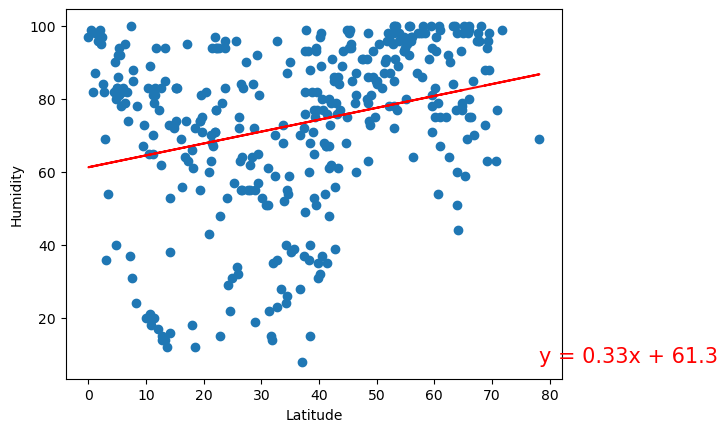

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

correlation = st.pearsonr(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


#print(regress_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

# Label plot and annotate the line equation
plt.annotate(line_equation,(x_values.max(), y_values.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.46x + 82.85
The r-value is: 0.12926915928642743


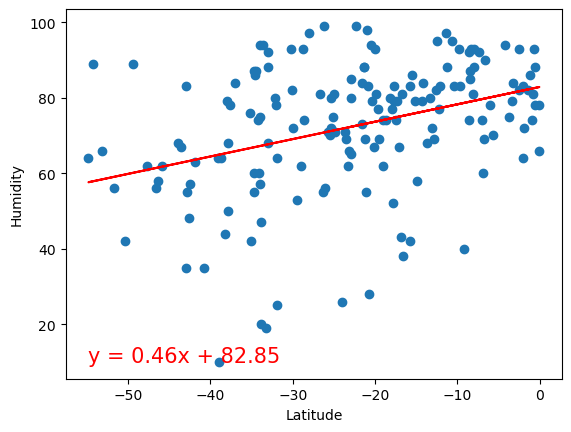

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

correlation = st.pearsonr(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


#print(regress_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

# Label plot and annotate the line equation
plt.annotate(line_equation,(x_values.min(), y_values.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

Based on the linear regression plot for both Northern and Southern Hemisphere, we can see that both hemispheres show a weak positive correlation between latitude and humidity. Both plots show, positive slope which suggests that as latitude increase, humidity tends to increase also. 

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.17x + 55.52
The r-value is: 0.00763811610578494


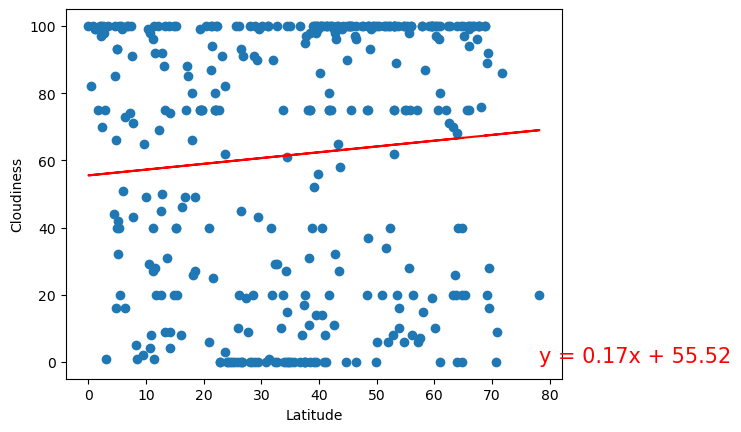

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

correlation = st.pearsonr(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


#print(regress_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

# Label plot and annotate the line equation
plt.annotate(line_equation,(x_values.max(), y_values.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.52x + 68.82
The r-value is: 0.03422806517678197


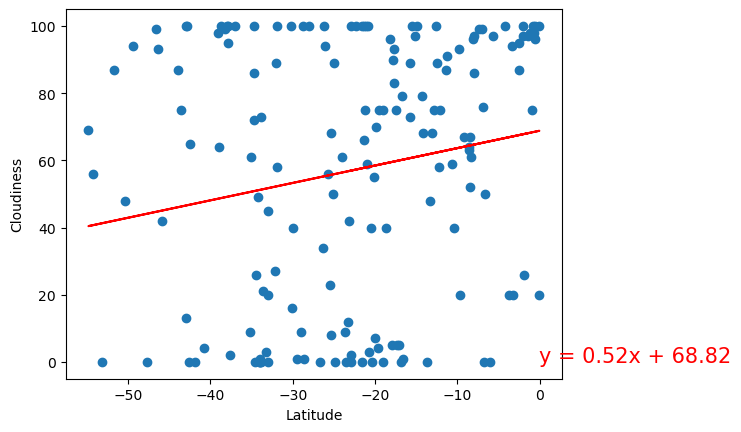

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

correlation = st.pearsonr(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


#print(regress_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

# Label plot and annotate the line equation
plt.annotate(line_equation,(x_values.max(), y_values.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

Based on the linear regression plot for both Northern and Southern Hemisphere, we can see that both hemispheres show a weak positive correlation between cloudiness and latitude. Both plots show, positive slope which suggests that as latitude increase, cloudiness tends to increase also. 

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.0x + 3.69
The r-value is: 0.0002339077751367


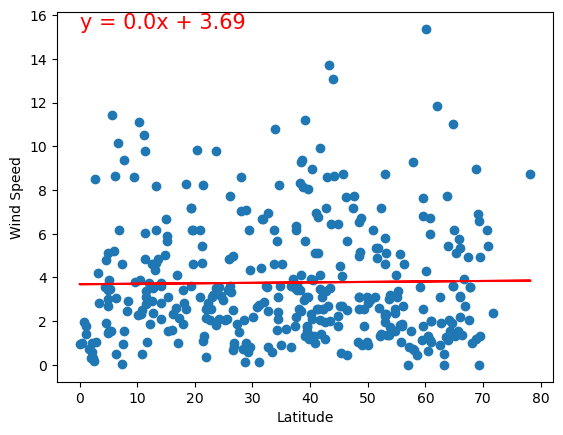

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

correlation = st.pearsonr(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


#print(regress_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

# Label plot and annotate the line equation
plt.annotate(line_equation,(x_values.min(), y_values.max()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.02x + 3.32
The r-value is: 0.01450178726435202


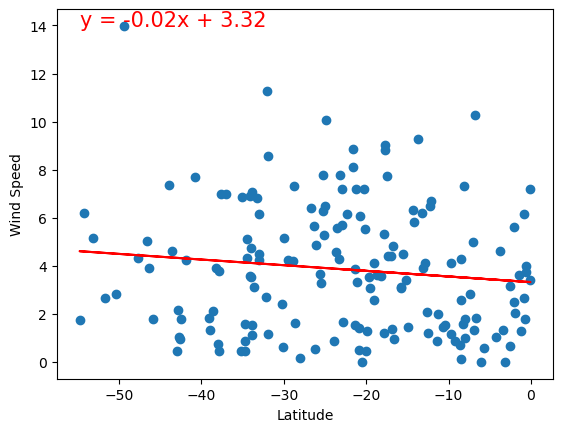

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

correlation = st.pearsonr(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


#print(regress_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

# Label plot and annotate the line equation
plt.annotate(line_equation,(x_values.min(), y_values.max()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

Based on the linear regression plot for both Northern and Southern Hemisphere, we can see that both hemispheres show a weak correlation between wind speed and latitude. 

For Northern Hemisphere, the slope was 0.0 which suggests a very weak positive correlation between wind speed and latitude, however the R-value was 0.0002339 which indicates a very weak correlation. It is almost like there is no apparant relationship between wind speed and latitude. 

For Southern Hemisphere, the slope was -0.02 which suggests a negative correlation between wind speed and latitude, however the R-value was 0.014501 which indicates a weak positive correlation. The R-Value suggests that there is a small tendency for the wind speed to decrease as you move closer to the equator. 